In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

### Import data

In [2]:
TFile *f1 = TFile::Open("ttbar_8TeV.root"); 
TFile *f2 = TFile::Open("Data_8TeV.root"); 

### Store trees

In [3]:
TTree *tree1 = (TTree*) f1->Get("mini");
TTree *tree2 = (TTree*) f2->Get("mini");

### MC variables

In [4]:
Bool_t e_trig1;
Bool_t mu_trig1;
Bool_t good_vtx1;
UInt_t lep_n1;
UInt_t jet_n1;
Float_t MET1;
Float_t MET_phi1;

Float_t lep_pt1[10];  
Float_t lep_eta1[10];  
Float_t lep_phi1[10];  
Float_t lep_E1[10];  
Int_t lep_type1[10];  
Float_t lep_ptcone301[10];
Float_t lep_etcone201[10];

Float_t jet_pt1[10];  
Float_t jet_eta1[10];
Float_t jet_jvf1[10];
Float_t jet_MV11[10];


tree1->SetBranchAddress("trigE", &e_trig1);
tree1->SetBranchAddress("trigM", &mu_trig1);
tree1->SetBranchAddress("hasGoodVertex", &good_vtx1);
tree1->SetBranchAddress("lep_n", &lep_n1);
tree1->SetBranchAddress("jet_n", &jet_n1);
tree1->SetBranchAddress("met_et", &MET1);
tree1->SetBranchAddress("met_phi", &MET_phi1);

tree1->SetBranchAddress("lep_pt", &lep_pt1);
tree1->SetBranchAddress("lep_eta", &lep_eta1);
tree1->SetBranchAddress("lep_phi", &lep_phi1);
tree1->SetBranchAddress("lep_E", &lep_E1);
tree1->SetBranchAddress("lep_type", &lep_type1);
tree1->SetBranchAddress("lep_ptcone30", &lep_ptcone301);
tree1->SetBranchAddress("lep_etcone20", &lep_etcone201);

tree1->SetBranchAddress("jet_pt", &jet_pt1);
tree1->SetBranchAddress("jet_eta", &jet_eta1);
tree1->SetBranchAddress("jet_jvf", &jet_jvf1);
tree1->SetBranchAddress("jet_MV1", &jet_MV11);


### Data variables

In [5]:
Bool_t e_trig2;
Bool_t mu_trig2;
Bool_t good_vtx2;
UInt_t lep_n2;
UInt_t jet_n2;
Float_t MET2;
Float_t MET_phi2;

Float_t lep_pt2[10];  
Float_t lep_eta2[10];  
Float_t lep_phi2[10];  
Float_t lep_E2[10];  
Int_t lep_type2[10];  
Float_t lep_ptcone302[10];
Float_t lep_etcone202[10];

Float_t jet_pt2[10];  
Float_t jet_eta2[10];
Float_t jet_jvf2[10];
Float_t jet_MV12[10];


tree2->SetBranchAddress("trigE", &e_trig2);
tree2->SetBranchAddress("trigM", &mu_trig2);
tree2->SetBranchAddress("hasGoodVertex", &good_vtx2);
tree2->SetBranchAddress("lep_n", &lep_n2);
tree2->SetBranchAddress("jet_n", &jet_n2);
tree2->SetBranchAddress("met_et", &MET2);
tree2->SetBranchAddress("met_phi", &MET_phi2);

tree2->SetBranchAddress("lep_pt", &lep_pt2);
tree2->SetBranchAddress("lep_eta", &lep_eta2);
tree2->SetBranchAddress("lep_phi", &lep_phi2);
tree2->SetBranchAddress("lep_E", &lep_E2);
tree2->SetBranchAddress("lep_type", &lep_type2);
tree2->SetBranchAddress("lep_ptcone30", &lep_ptcone302);
tree2->SetBranchAddress("lep_etcone20", &lep_etcone202);

tree2->SetBranchAddress("jet_pt", &jet_pt2);
tree2->SetBranchAddress("jet_eta", &jet_eta2);
tree2->SetBranchAddress("jet_jvf", &jet_jvf2);
tree2->SetBranchAddress("jet_MV1", &jet_MV12);


### Global Canvas

In [6]:
TCanvas *canvas = new TCanvas("Canvas","",800,600);

### Scale factors and weights of MC

In [7]:
Float_t eventWeight;
Float_t scaleFactor;
Float_t scaleFactor_PILEUP;
Float_t scaleFactor_ELE;
Float_t scaleFactor_MUON;
Float_t scaleFactor_BTAG;
Float_t scaleFactor_TRIGGER;
Float_t scaleFactor_JVFSF;
Float_t scaleFactor_ZVERTEX;
Float_t mcWeight;
Double_t evtw;

In [8]:
tree1->SetBranchAddress("scaleFactor_PILEUP", &scaleFactor_PILEUP);
tree1->SetBranchAddress("scaleFactor_ELE", &scaleFactor_ELE);
tree1->SetBranchAddress("scaleFactor_MUON", &scaleFactor_MUON);
tree1->SetBranchAddress("scaleFactor_BTAG", &scaleFactor_BTAG);
tree1->SetBranchAddress("scaleFactor_TRIGGER", &scaleFactor_TRIGGER);
tree1->SetBranchAddress("scaleFactor_JVFSF", &scaleFactor_JVFSF);
tree1->SetBranchAddress("scaleFactor_ZVERTEX", &scaleFactor_ZVERTEX);
tree1->SetBranchAddress("mcWeight", &mcWeight);

### Histograms for MC

In [9]:
TH1F *MCcutflow = new TH1F("Cutflow MC","Cutflow; Cut; Events",10,0,10);
TH1F *MChist_lep_pt = new TH1F("Lepton pT MC","lepton pT; pT(GeV);Events",50,0,1000);
TH1F *MChist_lep_trackiso = new TH1F("Lepton track isolation MC","lep_ptcone30/lep_pt; track isolation; Events",100,0,1.5);
TH1F *MChist_lep_caloiso = new TH1F("Lepton calorimeter isolation MC","lep_etcone20/lep_pt; calorimeter isolation; Events",100,0,1.5);
TH1F *MChist_lep_eta = new TH1F("Lepton eta MC","Lepton eta; eta; Events",100,-3,3);

TH1F *MChist_njets = new TH1F("Number of jets MC","n-jets; Jet multiplicity; Events",10,0,10);
TH1F *MChist_jet_pt = new TH1F("Jet pT MC","jet pT; pT(GeV);Events",50,10,300);
TH1F *MChist_jet_eta = new TH1F("Jet eta MC","jet eta; eta; Events",100,-3,3);
TH1F *MChist_jet_jvf = new TH1F("Jet jvf MC","jet jvf; jvf; Events",100,-1,1);
TH1F *MChist_jet_MV1 = new TH1F("Jet MV1 MC","jet MV1; MV1; Eventss",100,0,1);

TH1F *MChist_nbjets = new TH1F("Number of b-jets MC","n-bjets; Jet multiplicity; Events",10,0,10);

TH1F *MChist_MET = new TH1F("Energía perdida MC","MET; MET(GeV); Events",100,0,1000);

TH1F *MChist_mT = new TH1F("Masa reconstuida del W MC","mT; mT(GeV); Events",100,10,200);

### Histograms for Data

In [10]:
TH1F *Dcutflow = new TH1F("Cutflow Data","Cutflow; Cut; Events",10,0,10);
TH1F *Dhist_lep_pt = new TH1F("Lepton pT Data","lepton pT; pT(GeV);Events",50,0,1000);
TH1F *Dhist_lep_trackiso = new TH1F("Lepton track isolation Data","lep_ptcone30/lep_pt; track isolation; Events",100,0,1.5);
TH1F *Dhist_lep_caloiso = new TH1F("Lepton calorimeter isolation Data","lep_etcone20/lep_pt; calorimeter isolation; Events",100,0,1.5);
TH1F *Dhist_lep_eta = new TH1F("Lepton eta Data","Lepton eta; eta; Events",100,-3,3);

TH1F *Dhist_njets = new TH1F("Number of jets Data","n-jets; Jet multiplicity; Events",10,0,10);
TH1F *Dhist_jet_pt = new TH1F("Jet pT Data","jet pT; pT(GeV);Events",50,10,300);
TH1F *Dhist_jet_eta = new TH1F("Jet eta Data","jet eta; eta; Events",100,-3,3);
TH1F *Dhist_jet_jvf = new TH1F("Jet jvf Data","jet jvf; jvf; Events",100,-1,1);
TH1F *Dhist_jet_MV1 = new TH1F("Jet MV1 Data","jet MV1; MV1; Eventss",100,0,1);

TH1F *Dhist_nbjets = new TH1F("Number of b-jets Data","n-bjets; Jet multiplicity; Events",10,0,10);

TH1F *Dhist_MET = new TH1F("Energía perdida Data","MET; MET(GeV); Events",100,0,1000);

TH1F *Dhist_mT = new TH1F("Masa reconstuida del W Data","mT; mT(GeV); Events",100,10,200);

# Cuts for MC

In [11]:
Double_t L_MC=(0.072212854*49761200.21)/(137.29749*1000);
Double_t L_Data=1;
Double_t Weight = L_Data/L_MC;

In [12]:
int nentries, nbytes, i;
nentries = (Int_t)tree1->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree1->GetEntry(i); 
    //Event Weights
    evtw = scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_BTAG*scaleFactor_TRIGGER*scaleFactor_JVFSF*scaleFactor_ZVERTEX*mcWeight;
    
    //Zero cut
    MCcutflow->Fill(0.,evtw*Weight);
    // First cut: good vertex
    if(!good_vtx1) continue;
        MCcutflow->Fill(1,evtw*Weight);
    //Second cut: Trigger
    if(!e_trig1 && !mu_trig1) continue;
        MCcutflow->Fill(2,evtw*Weight);
    //Loop over leptons
    int n_lep1=0;
    for(unsigned int i=0; i<lep_n1; i++){
        int n_mu1=0;
        int n_el1=0;
        if( lep_pt1[i] <= 25000.) continue;
        if( lep_ptcone301[i]/lep_pt1[i] >= 0.15 ) continue;
        if( lep_etcone201[i]/lep_pt1[i] >= 0.15 ) continue;
        if( lep_type1 [i]==13 && TMath::Abs(lep_eta1[i]) < 2.5 ){n_mu1++;}
        if( lep_type1 [i]==11 && (TMath::Abs(lep_eta1[i])< 2.47 && TMath::Abs(lep_eta1[i])>1.52 || TMath::Abs(lep_eta1[i])<1.37 )){n_el1++;}
        if(n_mu1 == 0 && n_el1 == 0) continue;
        n_lep1++; 
    }
    //Third cut: one good lepton
    if(n_lep1!=1) continue;
        MCcutflow->Fill(3,evtw*Weight);
    //Fourth cut: At least 4 jets
    if(jet_n1<4) continue; 
        MCcutflow->Fill(4,evtw*Weight);
    //Loop over jets
    int n_jets1=0;
    int n_bjets1=0;
    for(unsigned int j=0; j<jet_n1; j++){
        // To complete: apply jet cuts to find the good jets
        if(jet_pt1[j] <= 25000.) continue;
        if(TMath::Abs(jet_eta1[j]) >= 2.5) continue;
        if(jet_pt1[j] < 50000. && TMath::Abs(jet_eta1[j])<2.4 && TMath::Abs(jet_jvf1[j]>0.5)){n_jets1++;}
        if(jet_pt1[j] >= 50000. || TMath::Abs(jet_eta1[j])>=2.4){n_jets1++;}
        // cut on 0.7892 MV1 and count the number of b-jets
        if(jet_MV11[j]>=0.7892){n_bjets1++;}
    }
    //Fifth cut: At least 4 good jets
    if(n_jets1<4) continue; 
    MCcutflow->Fill(5,evtw*Weight);
    //Sixth cut: at least one b-jet
    if(n_bjets1<2) continue;
    MCcutflow->Fill(6,evtw*Weight);
    //Seventh cut: MET > 30 GeV
    if(MET1<=30000.) continue;
    MCcutflow->Fill(7,evtw*Weight);
    //Lorentz Vectors
    TLorentzVector Lepton1  = TLorentzVector();
    TLorentzVector  MeT1  = TLorentzVector();
    float mTW1; 
    //To complete: Lorentz vectors for the lepton and MET. Use SetPtEtaPhiE().
    Lepton1.SetPtEtaPhiE(lep_pt1[0],lep_eta1[0],lep_phi1[0],lep_E1[0]);
    MeT1.SetPtEtaPhiE(MET1,0.,MET_phi1,MET1);
    //Calculation of the mTW using TLorentz vectors      
    mTW1 = sqrt(2*Lepton1.Pt()*MeT1.Et()*(1-cos(Lepton1.DeltaPhi(MeT1))));
    //Eight cut: mTW > 30 GeV*/
    if(mTW1<=30000.) continue;
    MCcutflow->Fill(8,evtw*Weight);
    
    
    
    // Histograms
    for(unsigned int j=0; j<lep_n1; j++){
        MChist_lep_pt->Fill(lep_pt1[j]/1000,evtw*Weight);
        MChist_lep_trackiso->Fill(lep_ptcone301[j]/lep_pt1[j],evtw*Weight);
        MChist_lep_caloiso->Fill(lep_etcone201[j]/lep_pt1[j],evtw*Weight);
        MChist_lep_eta->Fill(lep_eta1[j],evtw*Weight);
    }
    MChist_njets->Fill(jet_n1,evtw*Weight);
    for(unsigned int k=0; k<jet_n1; k++){
       MChist_jet_pt->Fill(jet_pt1[k]/1000,evtw*Weight);
       MChist_jet_jvf->Fill(jet_jvf1[k],evtw*Weight);
       MChist_jet_MV1->Fill(jet_MV11[k],evtw*Weight);
       MChist_jet_eta->Fill(jet_eta1[k],evtw*Weight);
       // b-jets 
       MChist_nbjets->Fill(n_bjets1,evtw*Weight);
    }
    MChist_MET->Fill(MET1/1000,evtw*Weight);
    MChist_mT->Fill(mTW1/1000,evtw*Weight);
}


In [13]:
int MCcut0 = MCcutflow->GetBinContent(1);
int MCcut1 = MCcutflow->GetBinContent(2);
int MCcut2 = MCcutflow->GetBinContent(3);
int MCcut3 = MCcutflow->GetBinContent(4);
int MCcut4 = MCcutflow->GetBinContent(5);
int MCcut5 = MCcutflow->GetBinContent(6);
int MCcut6 = MCcutflow->GetBinContent(7);
int MCcut7 = MCcutflow->GetBinContent(8);
int MCcut8 = MCcutflow->GetBinContent(9);

std::cout << "cut0:" << MCcut0 << std::endl;
std::cout << "Cut1:" << MCcut1 << std::endl;
std::cout << "Cut2:" << MCcut2 << std::endl;
std::cout << "Cut3:" << MCcut3 << std::endl;
std::cout << "Cut4:" << MCcut4 << std::endl;
std::cout << "Cut5:" << MCcut5 << std::endl;
std::cout << "Cut6:" << MCcut6 << std::endl;
std::cout << "Cut7:" << MCcut7 << std::endl;
std::cout << "Cut8:" << MCcut8 << std::endl;

cut0:55481
Cut1:55462
Cut2:55462
Cut3:49510
Cut4:23330
Cut5:23285
Cut6:8777
Cut7:7207
Cut8:6083


# Cuts for Data

In [14]:
int nentries, nbytes, j;
nentries = (Int_t)tree2->GetEntries();

for (j = 0; j < nentries; j++)
{
    nbytes = tree2->GetEntry(j); 
    
    Dcutflow->Fill(0);
    // First cut: good vertex
    if(!good_vtx2) continue;
        Dcutflow->Fill(1);
    //Second cut: Trigger
    if(!e_trig2 && !mu_trig2) continue;
        Dcutflow->Fill(2);
    
    
    //Loop over leptons
    int n_lep2=0;
    for(unsigned int i=0; i<lep_n2; i++){
        int n_mu2=0;
        int n_el2=0;
        if( lep_pt2[i] <= 25000.) continue;
        if( lep_ptcone302[i]/lep_pt2[i] >= 0.15 ) continue;
        if( lep_etcone202[i]/lep_pt2[i] >= 0.15 ) continue;
        if( lep_type2 [i]==13 && TMath::Abs(lep_eta2[i]) < 2.5 ){n_mu2++;}
        if( lep_type2 [i]==11 && (TMath::Abs(lep_eta2[i])< 2.47 && TMath::Abs(lep_eta2[i])>1.52 || TMath::Abs(lep_eta2[i])<1.37 )){n_el2++;}
        if(n_mu2 == 0 && n_el2 == 0) continue;
        n_lep2++; 
    }
    
    
    //Third cut: one good lepton
    if(n_lep2!=1) continue;
        Dcutflow->Fill(3); 
    //Fourth cut: At least 4 jets
    if(jet_n2<4) continue; 
        Dcutflow->Fill(4); 
    
    
    //Loop over jets
    int n_jets2=0;
    int n_bjets2=0;
    for(unsigned int j=0; j<jet_n2; j++){
        // To complete: apply jet cuts to find the good jets
        if(jet_pt2[j] <= 25000.) continue;
        if(TMath::Abs(jet_eta2[j]) >= 2.5) continue;
        if(jet_pt2[j] < 50000. && TMath::Abs(jet_eta2[j])<2.4 && TMath::Abs(jet_jvf2[j]>0.5)){n_jets2++;}
        if(jet_pt2[j] >= 50000. || TMath::Abs(jet_eta2[j])>=2.4){n_jets2++;}
        // cut on 0.7892 MV1 and count the number of b-jets
        if(jet_MV12[j]>=0.7892){n_bjets2++;}
    }
    
    
    
    //Fifth cut: At least 4 good jets
    if(n_jets2<4) continue; 
    Dcutflow->Fill(5); 
    //Sixth cut: at least one b-jet
    if(n_bjets2<2) continue;
    Dcutflow->Fill(6); 
    //Seventh cut: MET > 30 GeV
    if(MET2<=30000.) continue;
    Dcutflow->Fill(7); 
    
    TLorentzVector Lepton2  = TLorentzVector();
    TLorentzVector  MeT2  = TLorentzVector();
    float mTW2; 
    
    //To complete: Lorentz vectors for the lepton and MET. Use SetPtEtaPhiE().
    Lepton2.SetPtEtaPhiE(lep_pt2[0],lep_eta2[0],lep_phi2[0],lep_E2[0]);
    MeT2.SetPtEtaPhiE(MET2,0.,MET_phi2,MET2);
    
    //Calculation of the mTW using TLorentz vectors      
    mTW2 = sqrt(2*Lepton2.Pt()*MeT2.Et()*(1-cos(Lepton2.DeltaPhi(MeT2))));
    
    //Eight cut: mTW > 30 GeV*/
    if(mTW2<=30000.) continue;
    Dcutflow->Fill(8); 
    
    // Histograms
    for(unsigned int j=0; j<lep_n2; j++){
        Dhist_lep_pt->Fill(lep_pt2[j]/1000);
        Dhist_lep_trackiso->Fill(lep_ptcone302[j]/lep_pt2[j]);
        Dhist_lep_caloiso->Fill(lep_etcone202[j]/lep_pt2[j]);
        Dhist_lep_eta->Fill(lep_eta2[j]);
    }
    Dhist_njets->Fill(jet_n2);
    for(unsigned int k=0; k<jet_n2; k++){
       Dhist_jet_pt->Fill(jet_pt2[k]/1000);
       Dhist_jet_jvf->Fill(jet_jvf2[k]);
       Dhist_jet_MV1->Fill(jet_MV12[k]);
       Dhist_jet_eta->Fill(jet_eta2[k]);
       // b-jets 
       Dhist_nbjets->Fill(n_bjets2);
    }
    Dhist_MET->Fill(MET2/1000);
    Dhist_mT->Fill(mTW2/1000);
    
}
    


In [15]:
int Dcut0 = Dcutflow->GetBinContent(1);
int Dcut1 = Dcutflow->GetBinContent(2);
int Dcut2 = Dcutflow->GetBinContent(3);
int Dcut3 = Dcutflow->GetBinContent(4);
int Dcut4 = Dcutflow->GetBinContent(5);
int Dcut5 = Dcutflow->GetBinContent(6);
int Dcut6 = Dcutflow->GetBinContent(7);
int Dcut7 = Dcutflow->GetBinContent(8);
int Dcut8 = Dcutflow->GetBinContent(9);

std::cout << "cut0:" << Dcut0 << std::endl;
std::cout << "Cut1:" << Dcut1 << std::endl;
std::cout << "Cut2:" << Dcut2 << std::endl;
std::cout << "Cut3:" << Dcut3 << std::endl;
std::cout << "Cut4:" << Dcut4 << std::endl;
std::cout << "Cut5:" << Dcut5 << std::endl;
std::cout << "Cut6:" << Dcut6 << std::endl;
std::cout << "Cut7:" << Dcut7 << std::endl;
std::cout << "Cut8:" << Dcut8 << std::endl;

cut0:14945674
Cut1:14656440
Cut2:14656440
Cut3:11533697
Cut4:61833
Cut5:61516
Cut6:10804
Cut7:8557
Cut8:7180


# Comparison Data vs MC

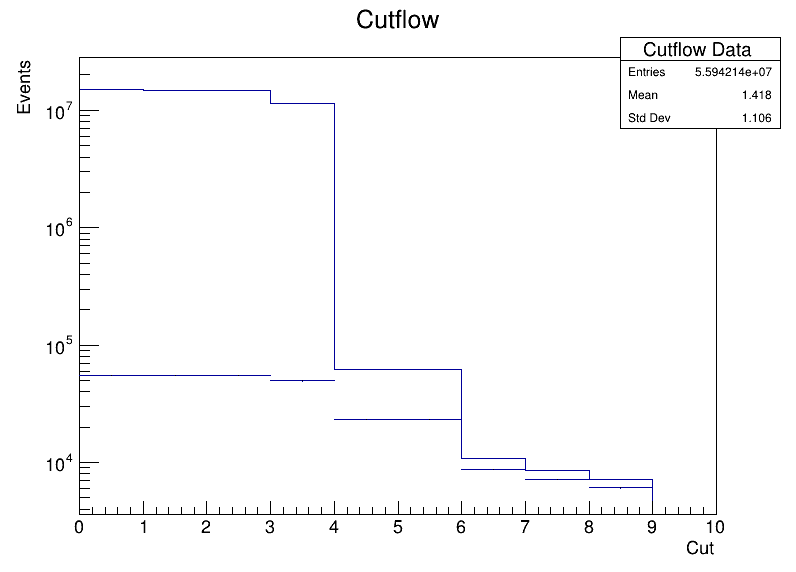

In [16]:
Dcutflow->Draw("HISTO");
MCcutflow->Draw("same");
canvas->SetLogy();
canvas->Draw();

# Comparison Data vs MC: variables after all cuts

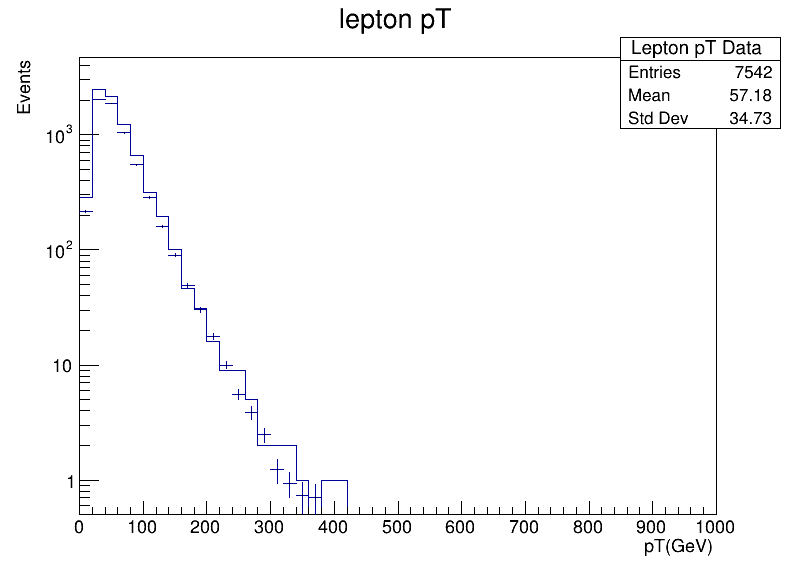

In [17]:
Dhist_lep_pt->Draw("HISTO");
MChist_lep_pt->Draw("same");

canvas->SetLogy();
canvas->Draw();

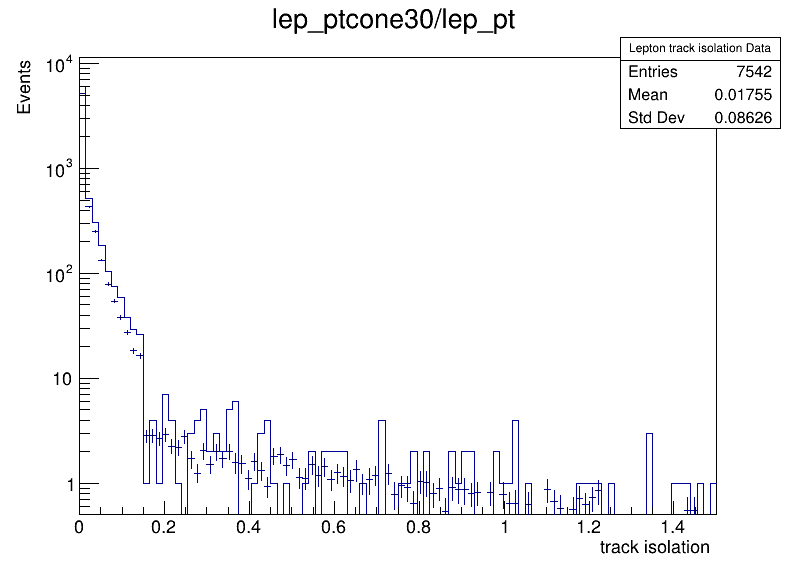

In [18]:
Dhist_lep_trackiso->Draw("HISTO");
MChist_lep_trackiso->Draw("same");

canvas->SetLogy();
canvas->Draw();

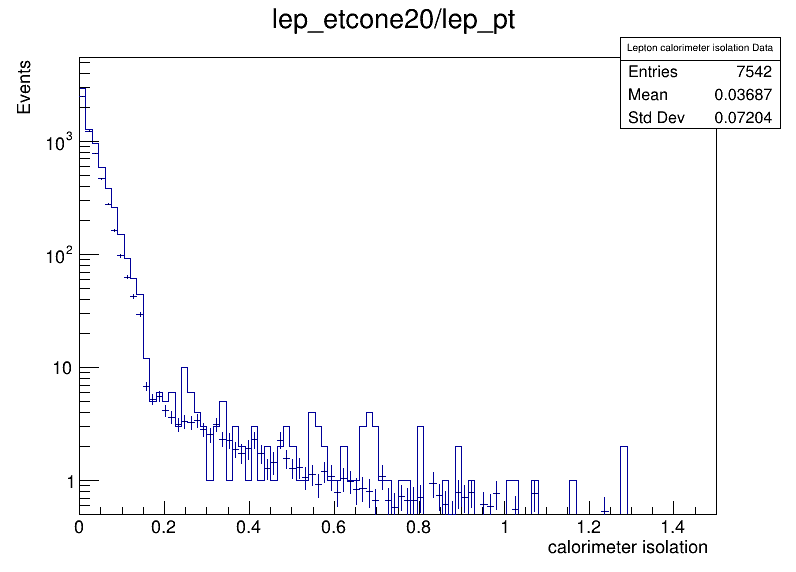

In [19]:
Dhist_lep_caloiso->Draw("HISTO");
MChist_lep_caloiso->Draw("same");

canvas->SetLogy();
canvas->Draw();

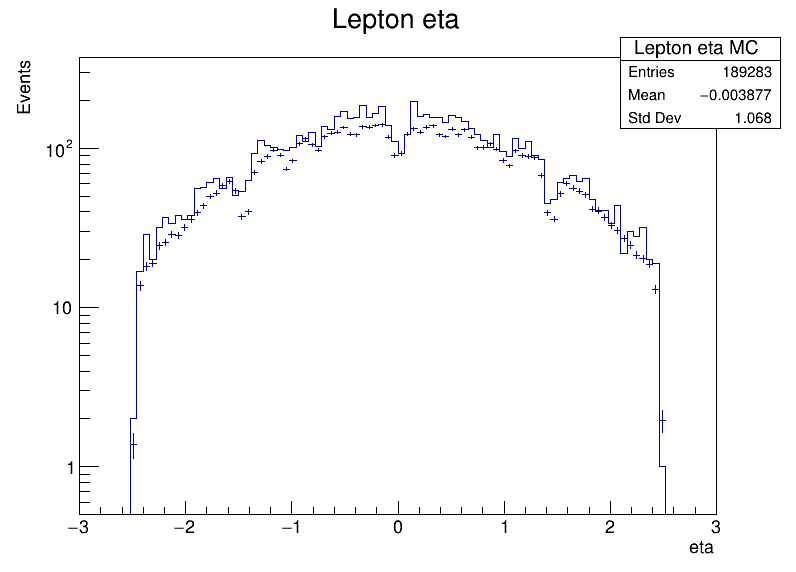

In [23]:
Dhist_lep_eta->Draw("HISTO");
MChist_lep_eta->Draw("same");

canvas->SetLogy();
canvas->Draw();

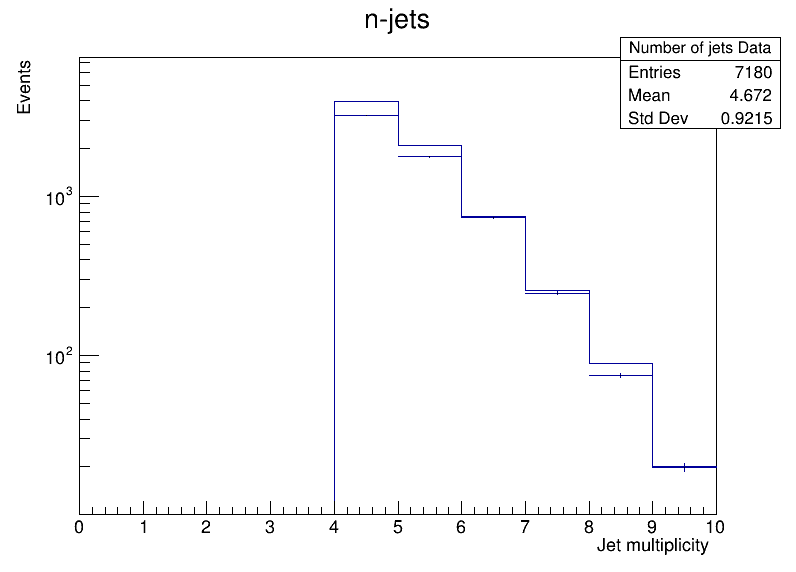

In [25]:
Dhist_njets->Draw("HISTO");
MChist_njets->Draw("same");

canvas->SetLogy();
canvas->Draw();

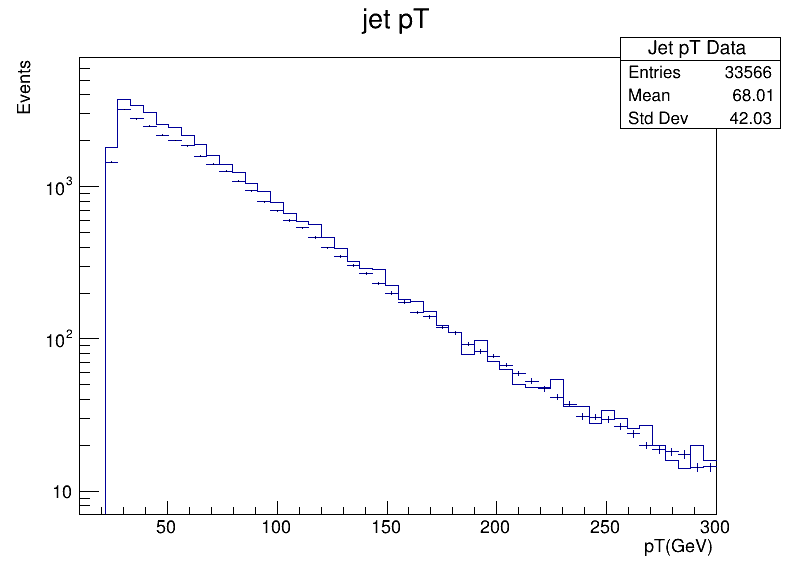

In [26]:
Dhist_jet_pt->Draw("HISTO");
MChist_jet_pt->Draw("same");

canvas->SetLogy();
canvas->Draw();

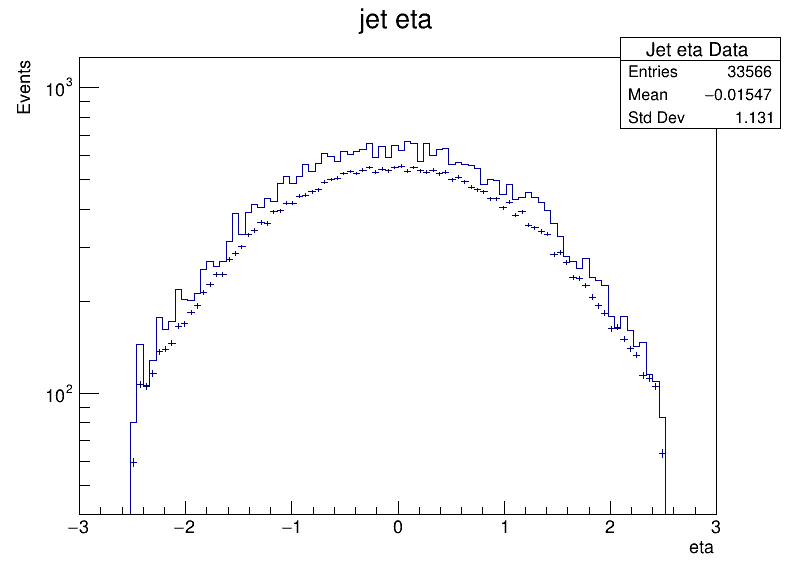

In [27]:
Dhist_jet_eta->Draw("HISTO");
MChist_jet_eta->Draw("same");

canvas->SetLogy();
canvas->Draw();

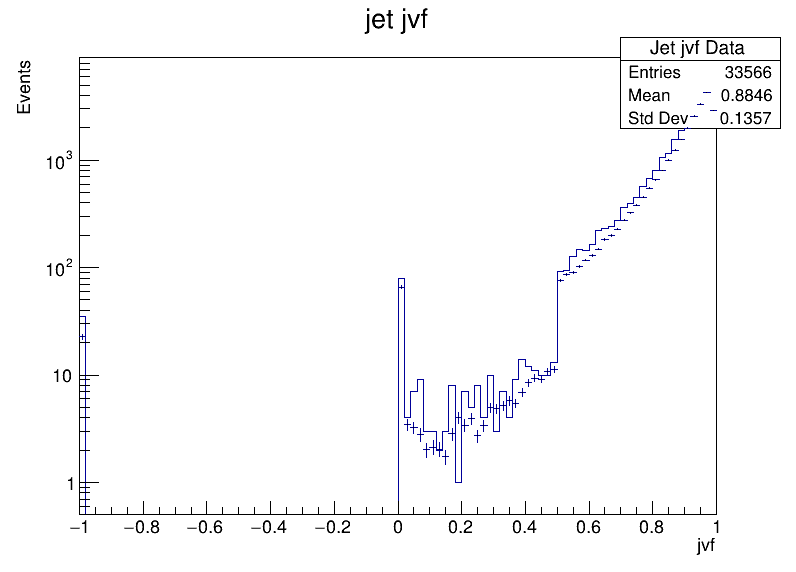

In [28]:
Dhist_jet_jvf->Draw("HISTO");
MChist_jet_jvf->Draw("same");

canvas->SetLogy();
canvas->Draw();

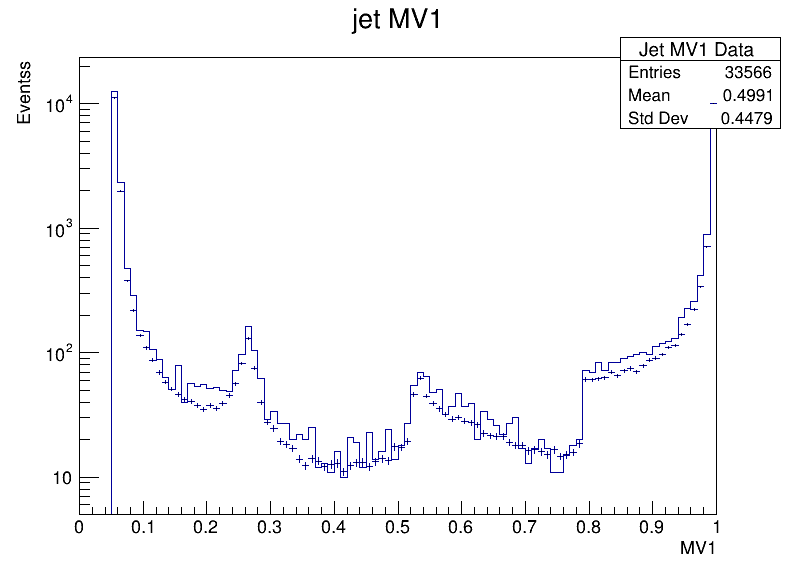

In [29]:
Dhist_jet_MV1->Draw("HISTO");
MChist_jet_MV1->Draw("same");

canvas->SetLogy();
canvas->Draw();

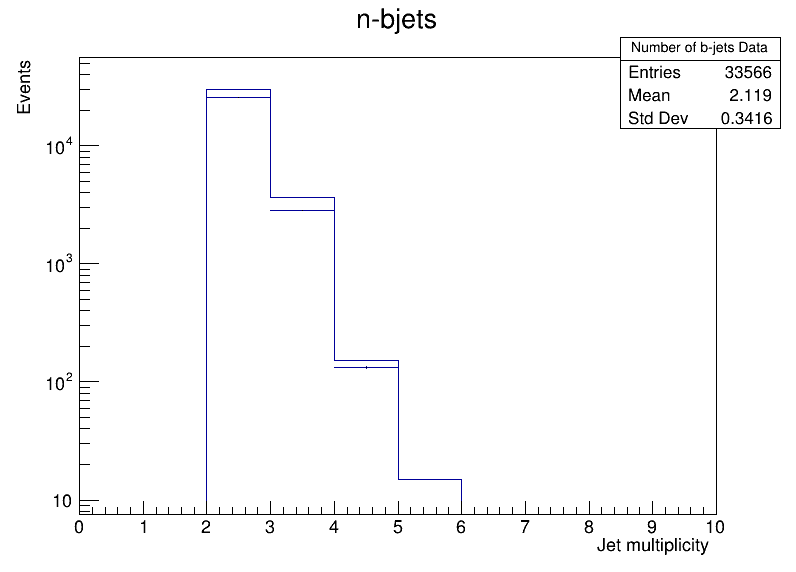

In [31]:
Dhist_nbjets->Draw("HISTO");
MChist_nbjets->Draw("same");

canvas->SetLogy();
canvas->Draw();

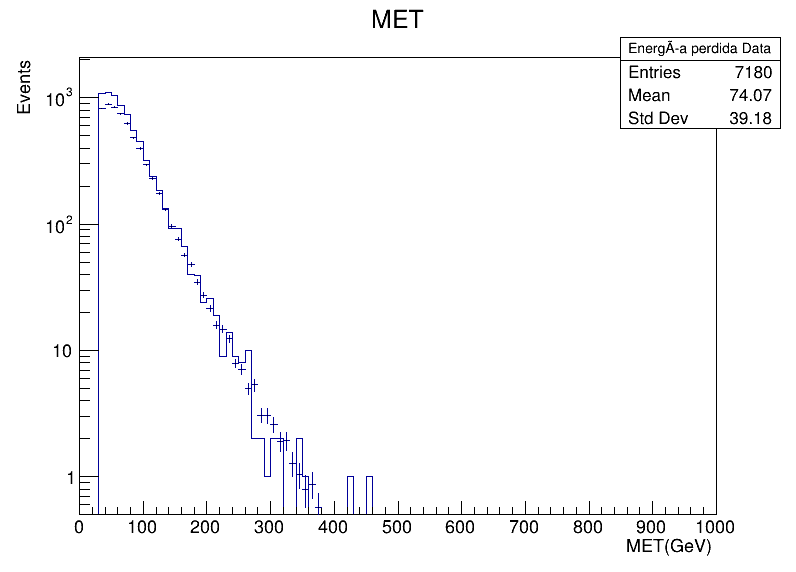

In [32]:
Dhist_MET->Draw("HISTO");
MChist_MET->Draw("same");

canvas->SetLogy();
canvas->Draw();

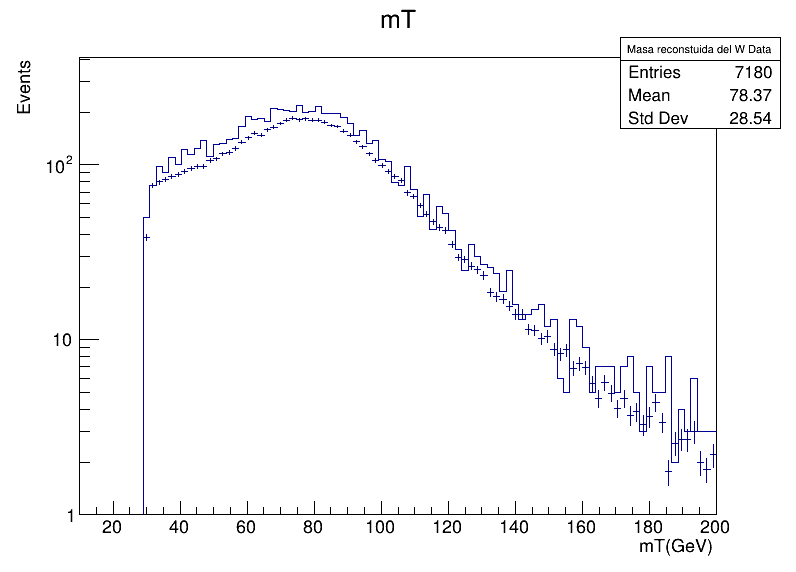

In [33]:
Dhist_mT->Draw("HISTO");
MChist_mT->Draw("same");

canvas->SetLogy();
canvas->Draw();